In [114]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots
import sys
%matplotlib inline

sys.path.append("/home/jonas/phd/NanoNets/src/")
sys.path.append("/mnt/c/Users/jonas/Desktop/phd/NanoNets/src/")

import nanonets
import nanonets_utils

In [115]:
folder = "/home/jonas/phd/data/lorenz_prediction/"
# folder = "/home/jonas/phd/NanoNets/scripts/2_funding_period/WP2/lorenz_system/data/"

In [116]:
transient_steps = 4000
std_input       = 0.2
x_vals          = np.loadtxt(f"x_vals.csv")
z_vals          = np.loadtxt(f"z_vals.csv")
x_vals          = std_input*(x_vals - np.mean(x_vals)) / np.std(x_vals)
z_vals          = (z_vals - np.mean(z_vals)) / np.std(z_vals)

step_size   = 1e-10
N_voltages  = len(x_vals)
time_steps  = step_size*np.arange(N_voltages)*1e9

In [117]:
epochs  = 1
data    = {epoch : np.loadtxt(f"{folder}z_pred_{epoch}.csv") for epoch in range(epochs)}
alphas  = np.linspace(0.1, 1.0, epochs)

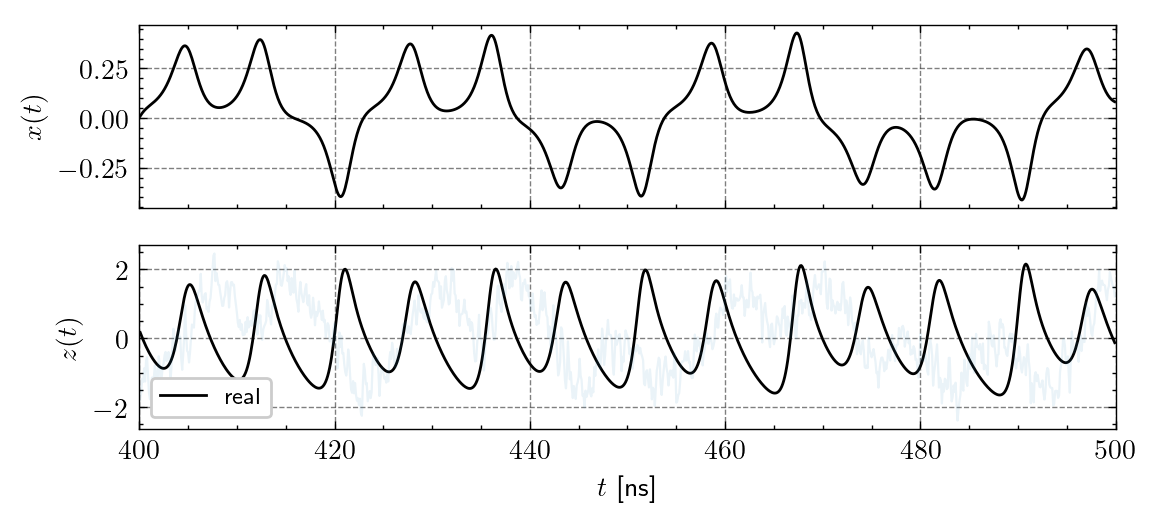

In [118]:
with plt.style.context(["science","bright","grid"]):

    fig = plt.figure(dpi=200)
    fig.set_figwidth(fig.get_figwidth()*1.8)

    ax  = fig.add_subplot(2,1,1)
    ax.plot(time_steps[transient_steps+1:], x_vals[transient_steps+1:], c='black')
    ax.set_ylabel("$x(t)$")
    ax.set_xticklabels("")
    ax.set_xlim(400,500)

    ax  = fig.add_subplot(2,1,2)

    ax.plot(time_steps[transient_steps+1:], z_vals[transient_steps+1:], c='black', label='real')

    for epoch, arr in data.items():

        ax.plot(time_steps[transient_steps+1:], arr[transient_steps:], lw=0.8, c=nanonets_utils.blue_color, alpha=alphas[epoch])
    
    ax.legend(fontsize='small')
    ax.set_xlim(400,500)
    ax.set_xlabel("$t$ [ns]")
    ax.set_ylabel("$z(t)$")